In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv("../datasets/IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


/Users/mahrukh/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



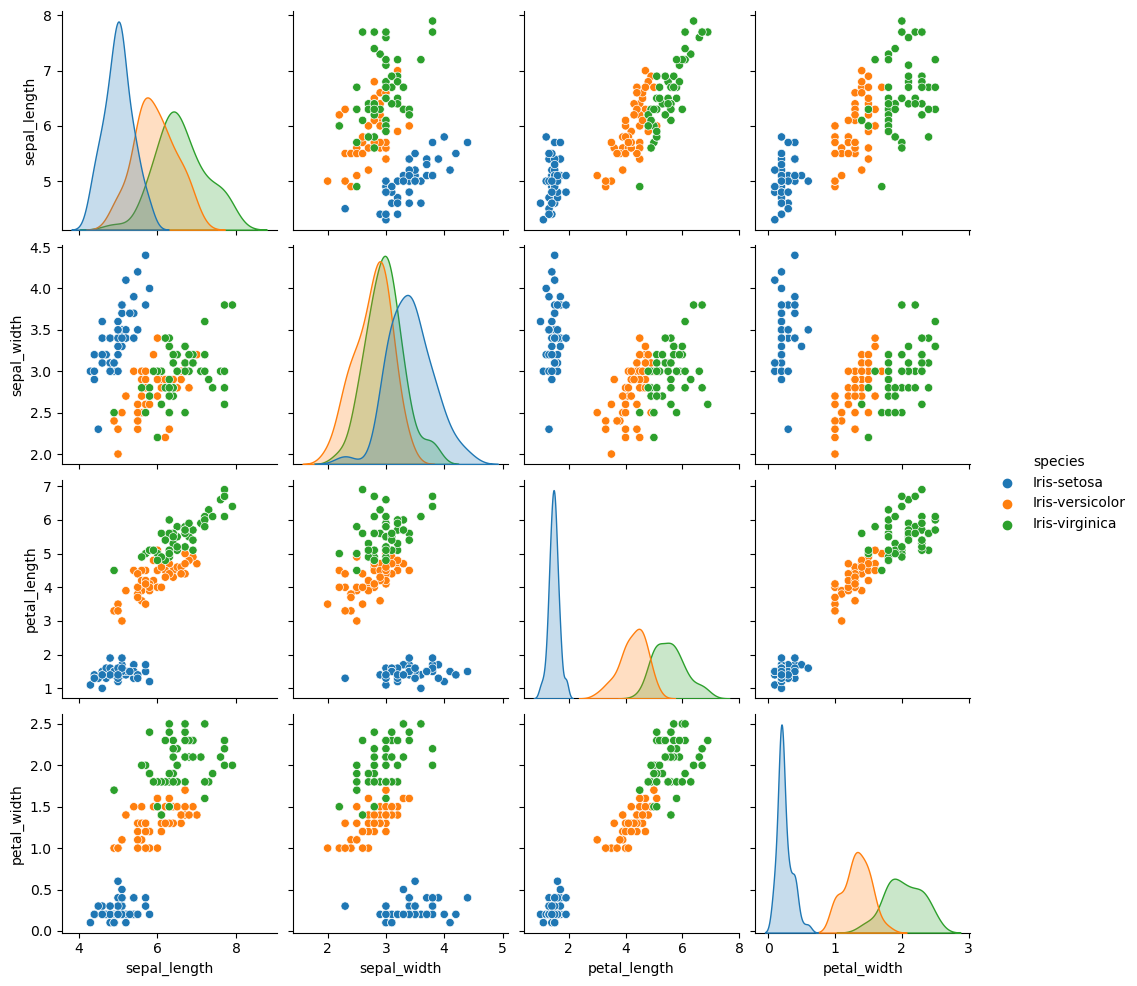

In [36]:
sns.pairplot(df, hue = 'species')

In [37]:
# We're seperating the species column
species = df["species"].tolist()
X = df.drop(columns=["species"])

In [38]:
# Standardize the data
X = (X - X.mean()) / X.std(ddof=0)

In [39]:
# Calculating the correlation matrix of the data
X_corr = (1 / 150) * X.T.dot(X)

Text(0.5, 1.0, 'Correlation matrix')

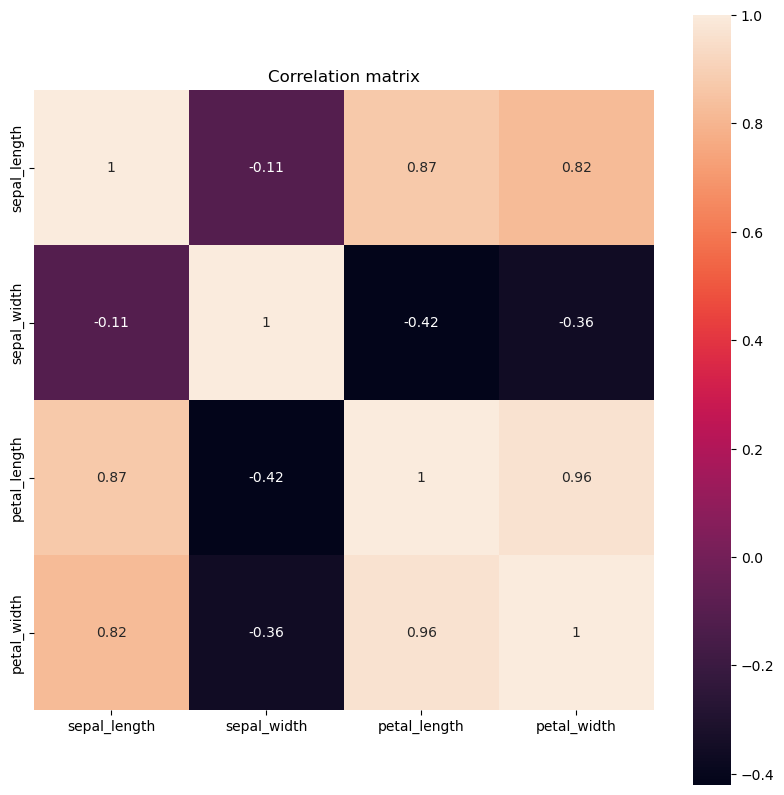

In [40]:
# Plotting the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(X_corr, vmax=1, square=True,annot=True)
plt.title('Correlation matrix')

The next step is to extract the eign values and their respective eigen vectors. ( It's important to have the sorted list of eigen values / eigen vectors) .

We'll try to calculate them using two methods :

In [41]:
# method1
u,s,v = np.linalg.svd(X_corr)
eig_values, eig_vectors = s, u
print("Eigen Values:", eig_values)
print("Eigen Vectors:", eig_vectors)

Eigen Values: [2.91081808 0.92122093 0.14735328 0.02060771]
Eigen Vectors: [[-0.52237162 -0.37231836  0.72101681  0.26199559]
 [ 0.26335492 -0.92555649 -0.24203288 -0.12413481]
 [-0.58125401 -0.02109478 -0.14089226 -0.80115427]
 [-0.56561105 -0.06541577 -0.6338014   0.52354627]]


In [42]:
# method2
np.linalg.eig(X_corr)

(array([2.91081808, 0.92122093, 0.14735328, 0.02060771]),
 array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
        [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
        [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
        [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]]))

Notice how the direction of some vectors is not the same in the two outputs. Despite that,our analysis will still be valid

In [43]:
np.sum(eig_values)

4.0

the sum of the eigen values is equal to number of variables

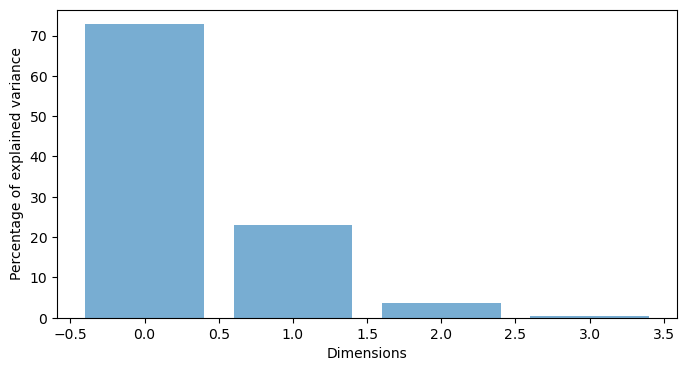

In [44]:
# plotting the variance explained by each PC 
explained_variance=(eig_values / np.sum(eig_values))*100
plt.figure(figsize=(8,4))
plt.bar(range(4), explained_variance, alpha=0.6)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Dimensions')
plt.show()

This bar chart shows us that the first two dimensions will be enough to represent the data.

So let's find these principal components:

In [45]:
# Now we want to perform dot production of the original data points with first two eigen vectors to get PC1 and PC2 
print(X.head())
print(eig_vectors[:,0:1])

   sepal_length  sepal_width  petal_length  petal_width
0     -0.900681     1.032057     -1.341272    -1.312977
1     -1.143017    -0.124958     -1.341272    -1.312977
2     -1.385353     0.337848     -1.398138    -1.312977
3     -1.506521     0.106445     -1.284407    -1.312977
4     -1.021849     1.263460     -1.341272    -1.312977
[[-0.52237162]
 [ 0.26335492]
 [-0.58125401]
 [-0.56561105]]


In [46]:
# calculating our new axis with dot product of X and first two eigen vectors
pc1 = X.dot(eig_vectors[:,0])
pc2 = X.dot(eig_vectors[:,1])

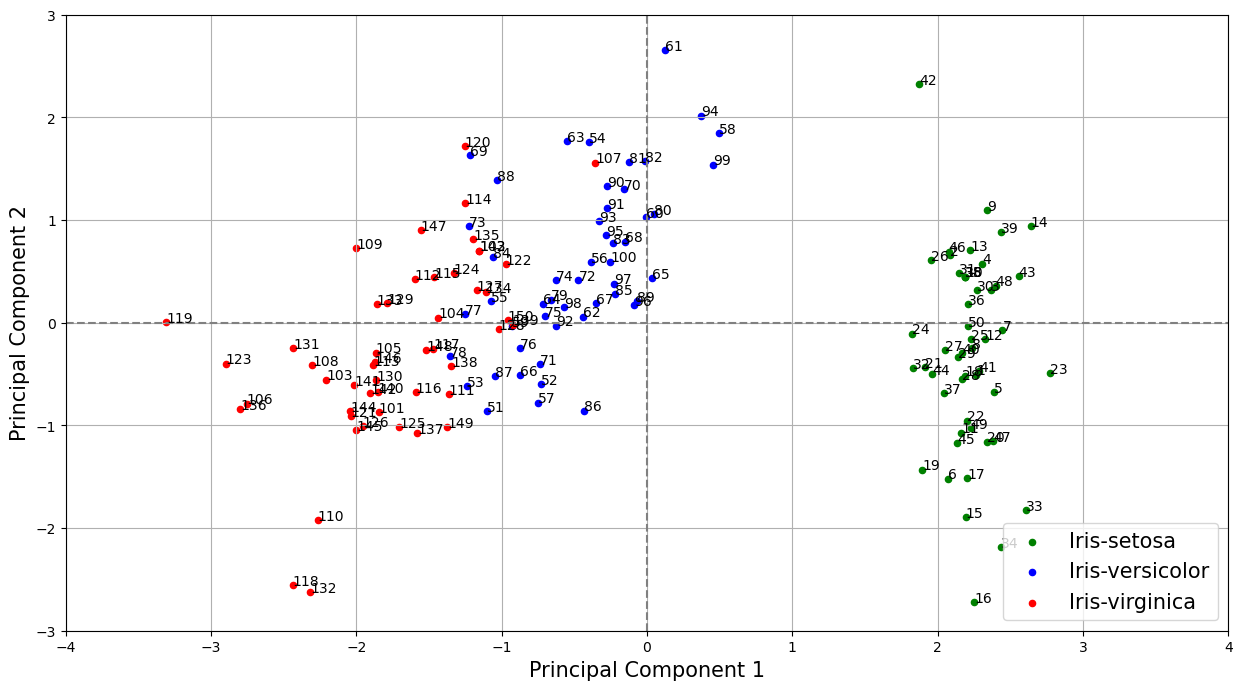

In [47]:
# plotting in 2D
def plot_scatter(pc1, pc2):
    fig, ax = plt.subplots(figsize=(15, 8))
    
    species_unique = list(set(species))
    species_colors = ["r","b","g"]
    
    for i, spec in enumerate(species):
        plt.scatter(pc1[i], pc2[i], label = spec, s = 20, c=species_colors[species_unique.index(spec)])
        ax.annotate(str(i+1), (pc1[i],pc2[i]))
    
    from collections import OrderedDict
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), prop={'size': 15}, loc=4)
    
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.axhline(y=0, color="grey", linestyle="--")
    ax.axvline(x=0, color="grey", linestyle="--")
    
    plt.grid()
    plt.axis([-4, 4, -3, 3])
    plt.show()
    
plot_scatter(pc1, pc2)

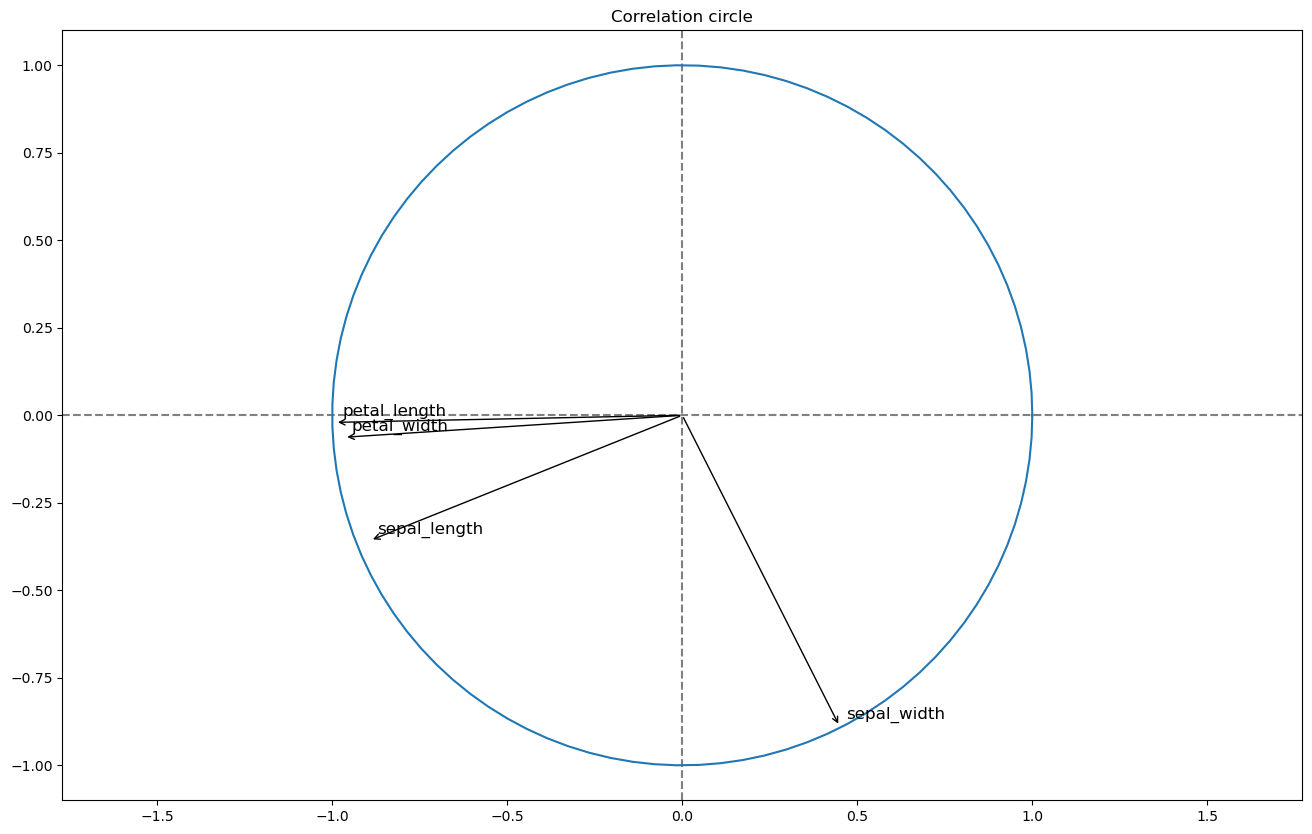

In [48]:
def plot_correlation_circle(pc1, pc2):    
    fig, ax = plt.subplots(figsize=(16, 10))

    for i in range(X.shape[1]):
        x = np.corrcoef(pc1,X[X.columns[i]])[0,1]
        y = np.corrcoef(pc2,X[X.columns[i]])[0,1]
        ax.annotate("", xy= (x,y), xytext=(0, 0),arrowprops=dict(arrowstyle="->"))
        ax.annotate(X.columns[i], (x+0.02,y+0.02), size=12)


    ax.set_title('Correlation circle')
    ax.axhline(y=0, color="grey", linestyle="--")
    ax.axvline(x=0, color="grey", linestyle="--")

    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))
    plt.axis('equal')
    plt.show()
    
plot_correlation_circle(pc1,pc2)

Well it seems that:

petal length & petal width are the main things that characterizes the data
virginica has relatively bigger petals while setosa has the smallest
a small group of setosa have a relatively big sepal_width

## 2. PCA with sklearn 

In this section we'll use the famous sklearn library instead

In [49]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

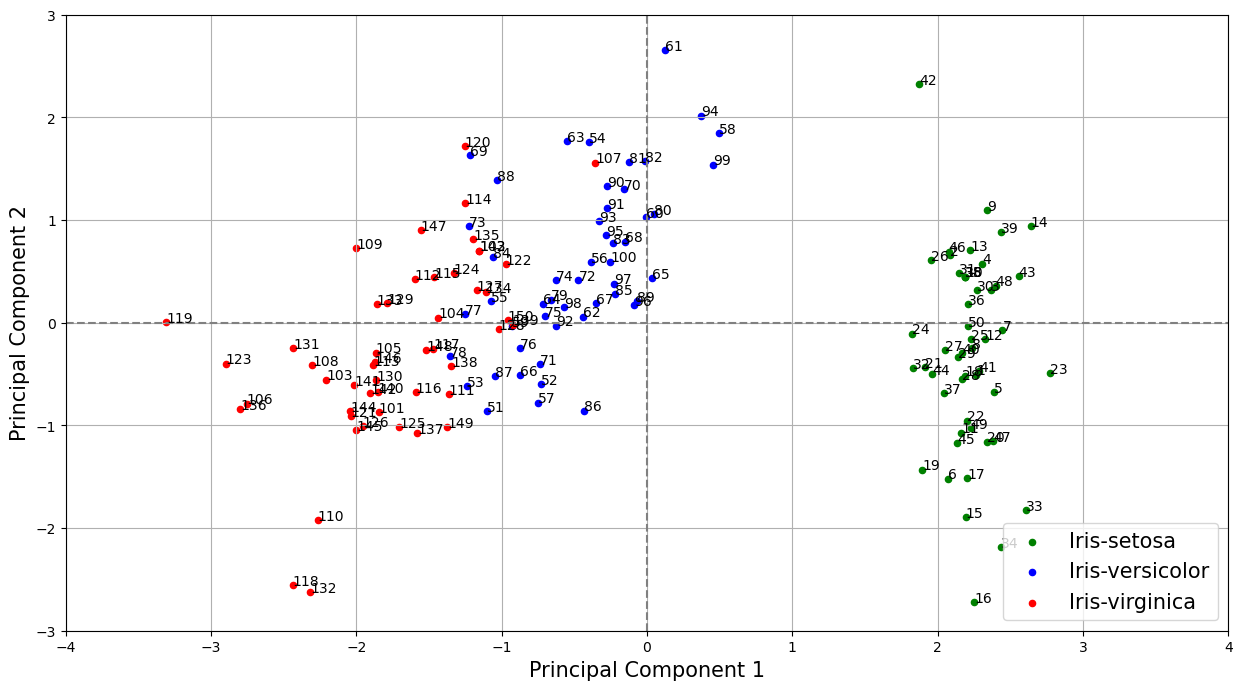

In [50]:
X = df.drop(columns=["species"])
X = StandardScaler().fit_transform(X)
pca = PCA()
result = pca.fit_transform(X)
# Remember what we said about the sign of eigen vectors that might change ?
pc1 = - result[:,0]
pc2 = - result[:,1]
plot_scatter(pc1, pc2)

This Free DLC consists of plotting the data in 3D.

Remember that in our case plotting the data in 2D is sufficient.

In [54]:
import plotly.express as px

In [56]:
pc3 = result[:,2]
pcs = pd.DataFrame(list(zip(pc1, pc2, pc3, species)),columns =['pc1', 'pc2', 'pc3', 'species']) 
fig = px.scatter_3d(pcs, x='pc1', y='pc2', z='pc3',color='species')
fig.show()